# Corpus Look Thru

here i plan to look thru the texts we have (mb vocabulary)

In [3]:
import os.path
import pandas as pd
import re
import matplotlib.pyplot as plt
from pymystem3 import Mystem

stopwords are from https://countwordsfree.com/stopwords/russian

## 0. Load Texts to a DF

Set a directory

In [4]:
directory = '/home/taorkon/VicBinRum/markup/checked-markup'

Create an empty data frame

In [5]:
articles_df = pd.DataFrame()

Create empty lists to temporary store articles' ids and texts

In [6]:
article_ids = []
article_texts = []

Walk thru the directory with article texts and store their ids and text to the lists

In [7]:
for (dirpath, dirnames, filenames) in os.walk(directory):
    
    for filename in filenames:
        
        if filename.endswith('.txt'):
            
            with open(os.sep.join([dirpath, filename]), 'r') as file:
                
                to_df = file.read()
                
            article_ids.append(int(filename[:3]))
            article_texts.append(to_df)
                

Move data to the dataframe

In [8]:
articles_df['id'] = article_ids
articles_df['article'] = article_texts

In [171]:
articles_df

,id,article,vic_text,article_length,vic_text_length,vic_text_percent,perp_text,perp_text_length,perp_text_percent,vbl_text,vbl_text_length,vbl_text_percent,vic_ref,perp_ref
0,217,<header>Изнасилование или нет: <vic><vic_ref>х...,"[(<vic, ><vic_ref>художница<vic_ref> показала ...",2777,334,12.027368,"[(<perp, _ref><rel>однокурсник</perp_ref> во в...",144,5.185452,"[(blm>, «Зачем тебе нужно было разрушать жизнь...",250,0.090025,"[[><, _ref>художница<, _ref> показала секс по ...",[[_ref><rel>однокурсник</perp_ref> во время св...
1,614,<header><impers><perp-a><perp-a_ref>Жителя Сар...,"[(<vic, -a_ref>девочки, </vic), (<vic, -a_ref>...",2447,200,8.173273,"[(<perp, -a><perp-a_ref>Жителя Саратова</perp-...",8,0.326931,[],0,0.000000,"[[-a_ref>девочки], [-a_ref>девятилетней девочк...",[[-a><perp-a_ref>Жителя Саратова</perp-a_ref> ...
2,314,<header><case><vic_ref>Кеше</vic_ref> не дали ...,"[(<vic, _ref>Кеше, </vic), (<vic, _blm><vic_re...",1848,122,6.601732,"[(<perp, _ref>продюсером,, </perp), (<perp, _r...",427,23.106061,"[(blm>, <vic_ref>Певица</vic_ref> <vic_report>...",16,0.008658,"[[_ref>Кеше], [_blm><, _ref>Певица</, _ref> <,...","[[_ref>продюсером,], [_ref>продюсера Dr. Luke]..."
4,307,"13:19, 9 июля 2020\n<header><case><impers>Осво...","[(<vic, -a><vic-a_ref>22-летней уроженки Казах...",1021,7,0.685602,"[(<perp, ><perp-[abc]_ref>трех полицейских,</p...",15,1.469148,[],0,0.000000,"[[-a><, -a_ref>22-летней уроженки Казахстана.<...","[[><perp-[abc]_ref>трех полицейских,</perp-[ab..."
5,223,<header>«Странные игры»: Как я справлялась с т...,"[(<vic, -a><vic-a_ref>Наша героиня Анна</vic-a...",9966,257,2.578768,"[(<perp, -a_ref>соседским мальчиком</perp-a_re...",7,0.070239,"[(blm>, Ты выглядишь как ш***а, которая делает...",49,0.004917,"[[-a><, -a_ref>Наша героиня Анна</, -a_ref> (<...","[[-a_ref>соседским мальчиком</perp-a_ref>, с к..."
6,225,<header><perp-a_ref>Подозреваемый в серии <per...,"[(<vic, -[ab]>двух <vic-[ab]>женщин<vic-[ab]> ...",757,6,0.792602,"[(<perp, -a_ref>Подозреваемый в серии <perp-as...",122,16.116248,[],0,0.000000,"[[-[ab]>двух <, -[ab]>женщин<, -[ab]> 1940 и 1...",[[-a_ref>Подозреваемый в серии <perp-as_phviol...
7,604,<header><case><enforce>СК</enforce> обвинил <p...,"[(<vic, _ref>школьницы, </vic), (<vic, >12-лет...",1114,187,16.786355,"[(<perp, _ref>жителя Красноярского края, </per...",146,13.105925,"[(blm>, Следователи считают, что сотрудники це...",302,0.271095,"[[_ref>школьницы], [_blm>Следователи считают, ...","[[_ref>жителя Красноярского края], [><perp_ref..."
8,219,<header><case><perp-ab>В Красноярском крае <pa...,"[(<vic, -a><vic-a_ref>Девушка</vic-a_ref> сбеж...",627,312,49.760766,"[(<perp, -ab>В Красноярском крае <passive>арес...",64,10.207337,[],0,0.000000,"[[-a><, -a_ref>Девушка</, -a_ref> сбежала от н...",[[-ab>В Красноярском крае <passive>арестованы ...
9,513,"﻿<header>Ничто не забыто.<impers><case-a>""Дело...","[(<vic, -a><sexc>сексуальных домогательствах и...",949,58,6.111697,"[(<perp, -a><perp-a_ref>Депардье</perp-a_ref>,...",88,9.272919,[],0,0.000000,[[-a><sexc>сексуальных домогательствах и изнас...,"[[-a><perp-a_ref>Депардье</perp-a_ref>], [-a><..."
10,602,12.06.2020 16:47 601\n<header>В Подмосковье <p...,"[(<vic, -[abc]_ref>женщин</vic-[abc]_ref>. Бол...",1051,13,1.236917,"[(<perp, -a-a_ref>сантехник, </perp), (<perp, ...",88,8.372978,[],0,0.000000,"[[-[abc]_ref>женщин</, -[abc]_ref>. Большую ча...","[[-a-a_ref>сантехник], [-a-a_ref>подозреваемог..."


In [155]:
articles_df  = articles_df.drop(labels = 3, axis = 0)

## 1. Find Text Related to Victims

Add text related to victims to the DF

In [168]:
articles_df['vic_text'] = articles_df['article'].apply(lambda x: re.findall('(<vic)(.*)(</vic)', x))

In [169]:
#articles_df

Length of the article

In [170]:
articles_df['article_length'] = articles_df['article'].apply(lambda x: len(re.findall('[А-Яа-я]', x)))

Length of the result of re.findall (e.g. for <vic\>)

In [13]:
def intag_length_counter(x):
    
    if len(x) == 0:
        
        text_length = 0
    
    else:
    #print(x)
    #x = x[1:-1]
    
        for item in x:
        
            item = list(item)
            counter = len(item)
            text_length = 0
    
            while counter > 0:
                text_length += len(re.findall('[А-Яа-я]', item[counter-1]))
                counter -= 1
    
    return text_length
    

Tryout of the function

In [14]:
#intag_length_counter(articles_df['vic_text'][3])

Count vic_text_length for all the df

In [172]:
articles_df['vic_text_length'] = articles_df['vic_text'].apply(lambda x: intag_length_counter(x))

Count the percentage of text about victims in an article

In [173]:
articles_df['vic_text_percent'] = (articles_df['vic_text_length']/articles_df['article_length']) * 100

Plot the vic text percentage

Text(0, 0.5, 'Number of Articles')

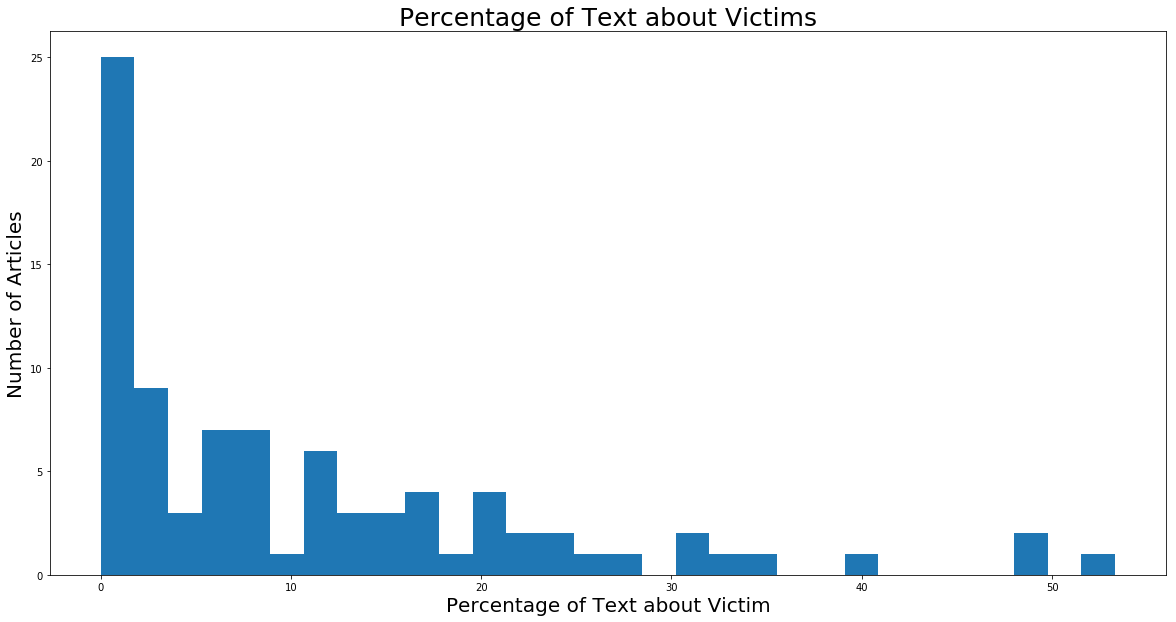

In [373]:
plt.figure(figsize=(20,10))
plt.hist(articles_df['vic_text_percent'], bins=30)

plt.title('Percentage of Text about Victims', fontsize=25)
plt.xlabel('Percentage of Text about Victim', fontsize=20)
plt.ylabel('Number of Articles', fontsize=20)

Plot abs len of text about victims

Text(0, 0.5, 'Number of Articles')

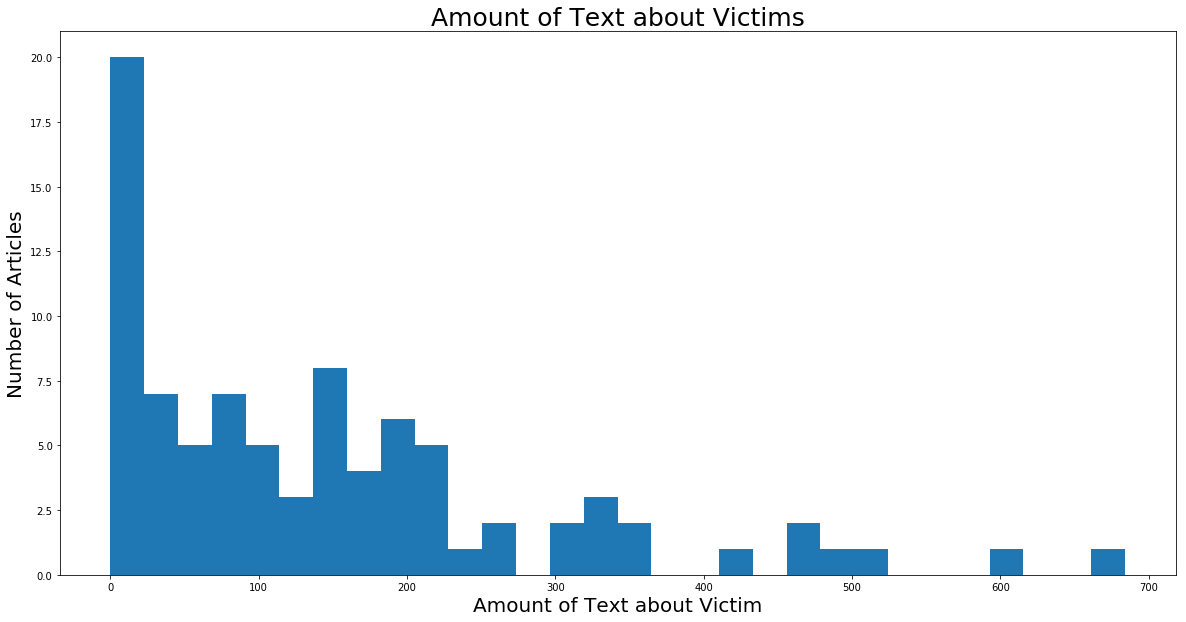

In [374]:
plt.figure(figsize=(20,10))
plt.hist(articles_df['vic_text_length'], bins=30)

plt.title('Amount of Text about Victims', fontsize=25)
plt.xlabel('Amount of Text about Victim', fontsize=20)
plt.ylabel('Number of Articles', fontsize=20)

Article length and percentage of vic text

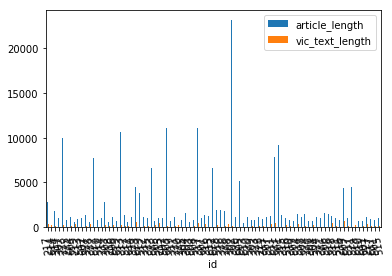

In [167]:
articles_df.plot.bar(x = 'id', y = ['article_length', 'vic_text_length'], rot = 100)

## 2. Find Text Related to Perpetrators

In [18]:
articles_df['perp_text'] = articles_df['article'].apply(lambda x: re.findall('(<perp|<perp-)(.*)(</perp|</perp-)', x))

In [19]:
#articles_df

In [20]:
articles_df['perp_text_length'] = articles_df['perp_text'].apply(lambda x: intag_length_counter(x))

In [161]:
articles_df['perp_text_percent'] = (articles_df['perp_text_length']/articles_df['article_length']) * 100

Text(0, 0.5, 'Number of Articles')

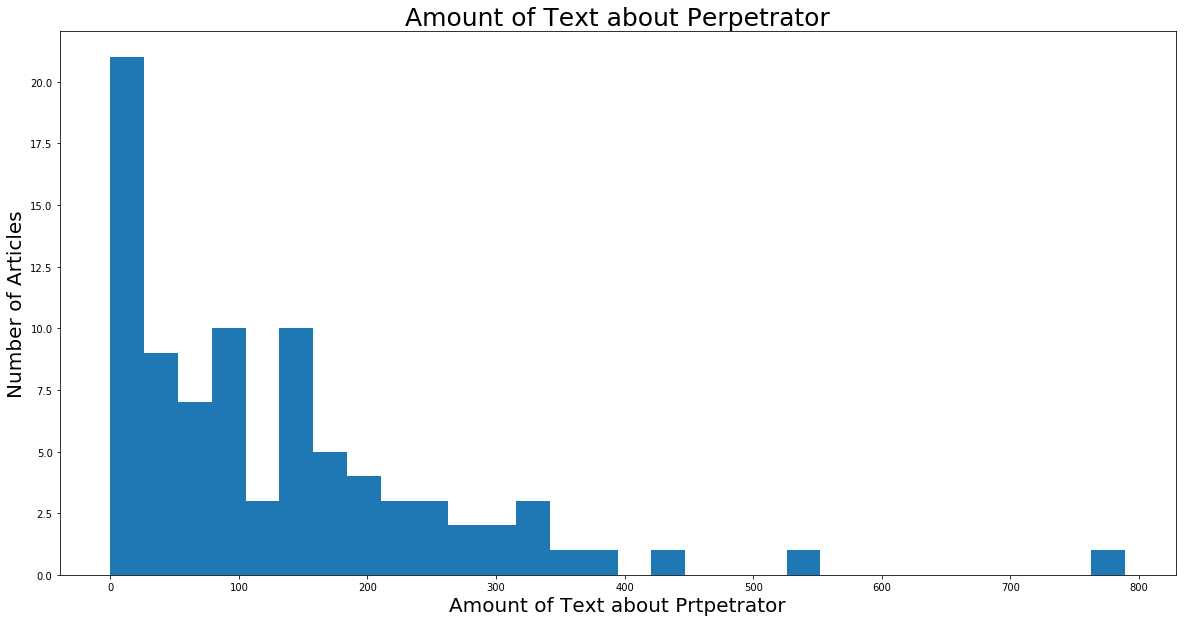

In [375]:
plt.figure(figsize=(20,10))
plt.hist(articles_df['perp_text_length'], bins=30)

plt.title('Amount of Text about Perpetrator', fontsize=25)
plt.xlabel('Amount of Text about Prtpetrator', fontsize=20)
plt.ylabel('Number of Articles', fontsize=20)

Text(0, 0.5, 'Number of Articles')

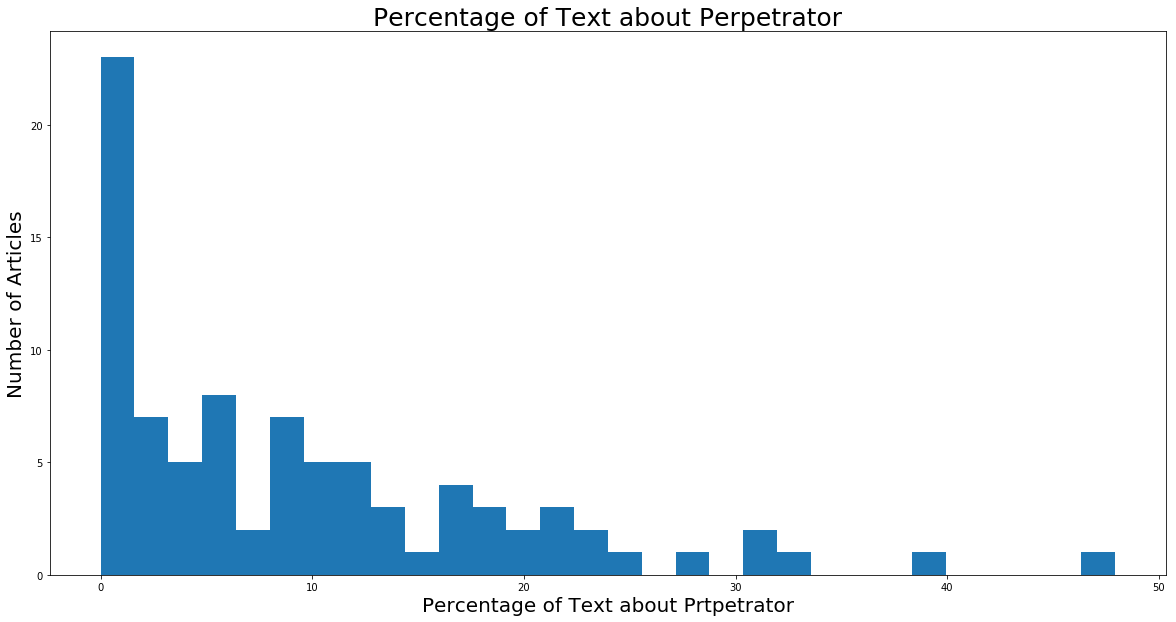

In [376]:
plt.figure(figsize=(20,10))
plt.hist(articles_df['perp_text_percent'], bins=30)

plt.title('Percentage of Text about Perpetrator', fontsize=25)
plt.xlabel('Percentage of Text about Prtpetrator', fontsize=20)
plt.ylabel('Number of Articles', fontsize=20)

## 3. perp/vic text

divide df by the length of an article (<1000, 1000-3000, 3000-5000, >5000)

In [181]:
df_1000 = articles_df.query('article_length < 1000')

In [183]:
#df_1000

In [203]:
df_1500 = articles_df.query('article_length > 1000 & article_length < 1500')

In [186]:
#df_5000 = articles_df.query('article_length >  & article_length < 5000')

In [204]:
df_more_1500 = articles_df.query('article_length > 1500')

In [205]:
print(len(df_1000), len(df_1500), len(df_more_1500))

29 32 26


Plot a hist for each new df comparing the amount of perp vs victim text

Text(0.5, 0, 'Article ID')

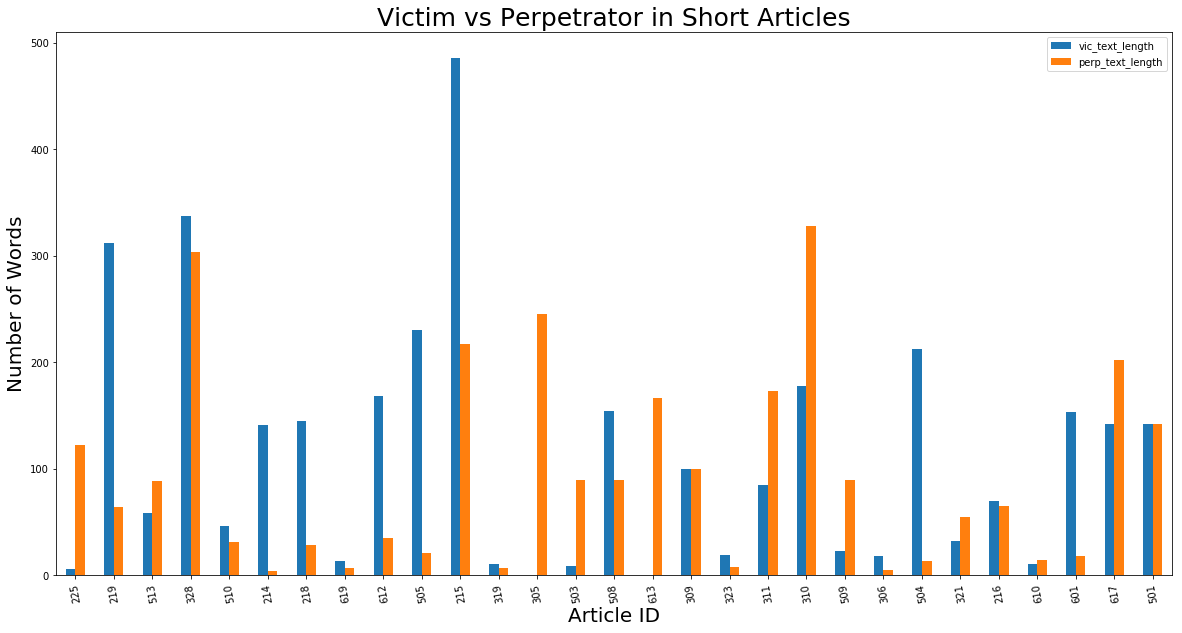

In [378]:
df_1000.plot.bar(x = 'id', y = ['vic_text_length', 'perp_text_length'], rot = 100, figsize=(20,10))
plt.title('Victim vs Perpetrator in Short Articles', fontsize=25)
plt.ylabel('Number of Words', fontsize=20)
plt.xlabel('Article ID', fontsize=20)

Text(0.5, 0, 'Article ID')

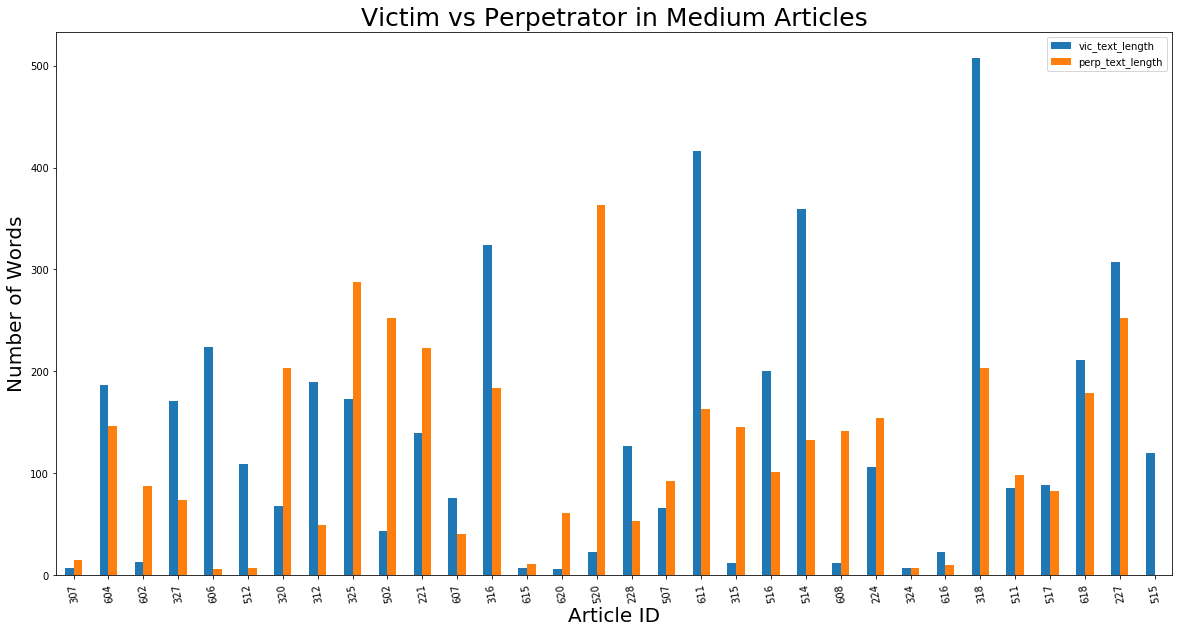

In [379]:
df_1500.plot.bar(x = 'id', y = ['vic_text_length', 'perp_text_length'], rot = 100, figsize=(20,10))
plt.title('Victim vs Perpetrator in Medium Articles', fontsize=25)
plt.ylabel('Number of Words', fontsize=20)
plt.xlabel('Article ID', fontsize=20)

Text(0.5, 0, 'Article ID')

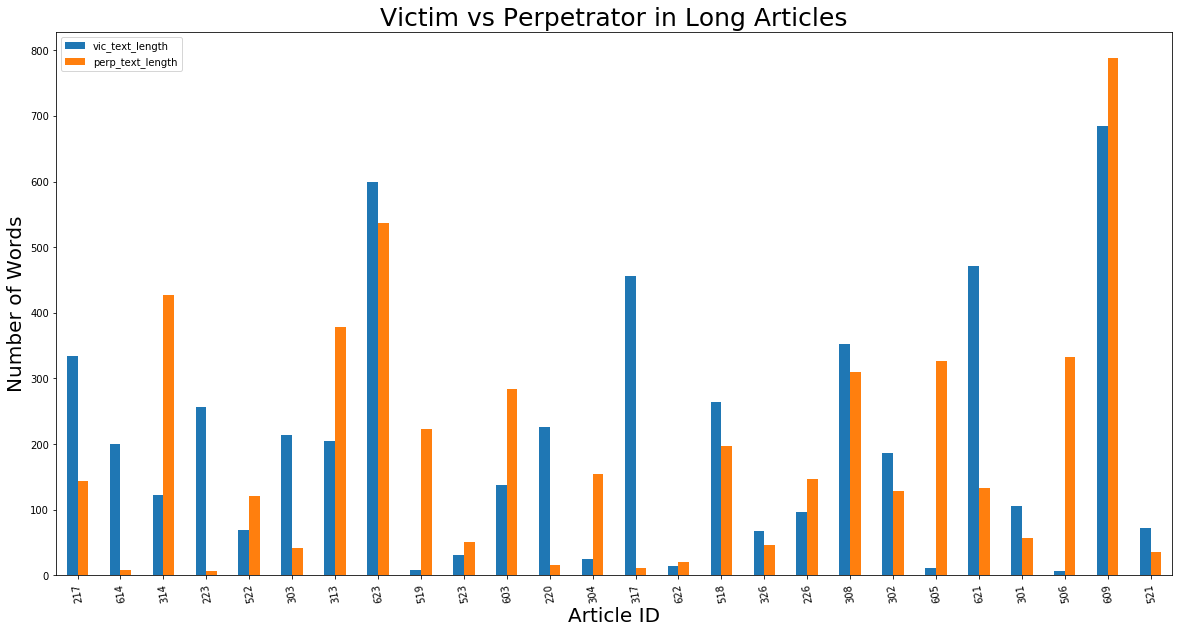

In [380]:
df_more_1500.plot.bar(x = 'id', y = ['vic_text_length', 'perp_text_length'], rot = 100, figsize=(20,10))
plt.title('Victim vs Perpetrator in Long Articles', fontsize=25)
plt.ylabel('Number of Words', fontsize=20)
plt.xlabel('Article ID', fontsize=20)

## 3. <vbl\>

VBL text to a sep column

In [23]:
articles_df['vbl_text'] = articles_df['article'].apply(lambda x: re.findall('(blm>)(.*)(blm>)', x))

In [24]:
#articles_df

Vbl text length

In [25]:
articles_df['vbl_text_length'] = articles_df['vbl_text'].apply(lambda x: intag_length_counter(x))

In [275]:
articles_df['vbl_text_percent'] = (articles_df['vbl_text_length']/articles_df['article_length'])*100

Text(0, 0.5, 'Number of Articles')

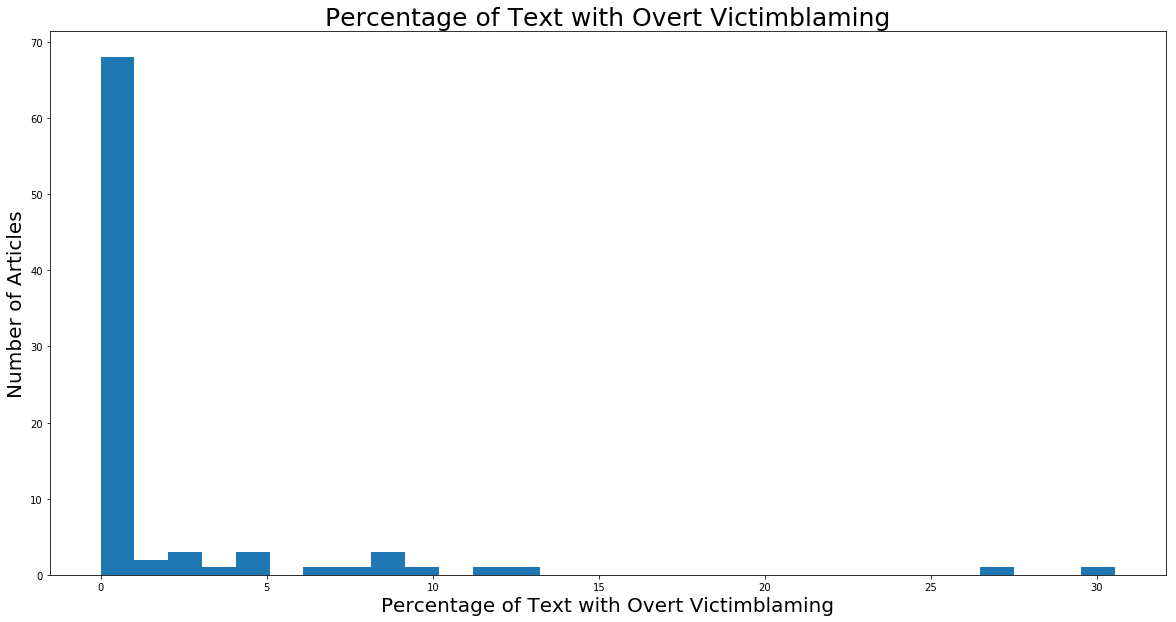

In [381]:
plt.figure(figsize=(20,10))
plt.hist(articles_df['vbl_text_percent'], bins=30)

plt.title('Percentage of Text with Overt Victimblaming', fontsize=25)
plt.xlabel('Percentage of Text with Overt Victimblaming', fontsize=20)
plt.ylabel('Number of Articles', fontsize=20)

## 4. Vic Text Extraction

All vic texts to one list

In [28]:
tmp_vic_texts = articles_df['vic_text'].tolist()

In [29]:
#tmp_vic_texts

Concat all the listst

In [30]:
vic_texts = tmp_vic_texts[0]
tmp_new_vic_texts = tmp_vic_texts[1:]

for i in range(len(tmp_new_vic_texts)):
    
    vic_texts.extend(tmp_new_vic_texts[i])

In [31]:
#vic_texts

Get rid of the tags, all the texts into a single entity (string).

In [46]:
def text_extractor(x):
    
    text = []
    
    #live only cyrillic text
    
    for item in x:
        
        item = list(item)
        counter = len(item)
        #text = []
    
        while counter > 0:
            
            res = re.findall('[А-Яа-я ]', item[counter-1])
            
            if len(res) > 0:
                
                text.append(res)
                
            counter -= 1
            
            
    #lists to str
    
    for i in range(len(text)):
        
        text[i] = ''.join(text[i])

    text = '. '.join(text)
    
    return text

In [47]:
vic_text = text_extractor(vic_texts) #all fragments of articles concearning victims concat into one str

In [34]:
#vic_text_list  = vic_text_list.apply

In [49]:
len(vic_text.split())

11054

## 5. Pepr Text Extraction

All texts to one list

In [36]:
tmp_perp_texts = articles_df['perp_text'].tolist()

Extract text, concatinate lists

In [37]:
perp_texts = tmp_perp_texts[0]
tmp_new_perp_texts = tmp_perp_texts[1:]

for i in range(len(tmp_new_perp_texts)):
    
    perp_texts.extend(tmp_new_perp_texts[i])

Get rid of the tags, all the texts into a single entity (string).

In [50]:
perp_text = text_extractor(perp_texts) #all fragments of articles concearning perps concat into one str

In [52]:
len(perp_text.split())

12071

Note the difference in the amount of text about the perpetrators and the victims. All the texts were extracted from the same corpus of news articles. However, it is evident, that the focus is mostly on the victims. On the one hand, the text may convey how they tried to cope with the concequences of assaults. Nevertheless, the perpetrators are much less talked about. 

It may reflect the tendency to concentrate our attention on the victims and their lives rather than the perpetrators. It may also be a symptom of victim-blaming. Shifring the focus on the victims (what they were doing when they were aasaulted, what they were wearing, whether they were drunk, etc.) **Reference why focus shifting is bad**

## 4.Prepross Vic

In [40]:
#vic_text

In [53]:
m = Mystem()

In [54]:
vic_text_lem = ''.join(m.lemmatize(vic_text))

vic_text_lem = ''.join(re.findall('[А-Яа-я ]',vic_text_lem))

prepross the text for the oppose function

In [224]:
clean_vic_text_lem = []

for i in vic_text_lem.split():
    
    if i not in stopwords:
        
        clean_vic_text_lem.append(i)

clean_vic_text_lem = " ".join(clean_vic_text_lem)

with open("vic_oppose.txt", "w") as text_file:
    text_file.write(clean_vic_text_lem)

## 5. Prepross Perp

In [56]:
perp_text_lem = ''.join(m.lemmatize(perp_text))
perp_text_lem = ''.join(re.findall('[А-Яа-я ]',perp_text_lem))

prepross for oppose

In [225]:
clean_perp_text_lem = []

for i in perp_text_lem.split():
    
    if i not in stopwords:
        
        clean_perp_text_lem.append(i)

clean_perp_text_lem = " ".join(clean_perp_text_lem)

with open("perp_oppose.txt", "w") as text_file:
    text_file.write(clean_perp_text_lem)

## 6. Freq Vic

Upload a list of stopwords.

In [58]:
with open('stop_words_russian.txt') as f:
    stopwords = f.read().split('\n')

In [59]:
def word_count(string, stopwords):
    counts = dict()
    words = string.split()

    for word in words:
        if word not in stopwords:
            if word in counts:
                counts[word] += 1
            else:
                counts[word] = 1

    return counts

In [60]:
vic_word_freq = word_count(vic_text_lem, stopwords)

In [62]:
vic_word_freq_df = pd.DataFrame.from_dict(vic_word_freq, orient='index', columns = ['freq'])

vic_word_freq_df = vic_word_freq_df.sort_values(by=['freq'])

v_list_length = len(vic_word_freq)

In [63]:
vic_word_freq_df.head()

,freq
маркес,1
захотеть,1
присваивать,1
навязнуть,1
следование,1


Lets drop the most and the least frequent words (cut 15% from the beginning and 10% from the bottom of the list)

In [64]:
start_idx = int((15 * v_list_length)/100)
end_idx = v_list_length - int((10 * v_list_length)/100)

vic_word_freq_df_cut = vic_word_freq_df.iloc[start_idx:end_idx]

In [65]:
#vic_word_freq_df_cut

## 7. Freq Perp

In [66]:
perp_word_freq = word_count(perp_text_lem, stopwords)

perp_word_freq_df = pd.DataFrame.from_dict(perp_word_freq, orient='index', columns = ['freq'])

perp_word_freq_df = perp_word_freq_df.sort_values(by=['freq'])

p_list_length = len(perp_word_freq)

Lets drop the most and the least frequent words (cut 15% from the beginning and 10% from the bottom of the list)

In [67]:
start_idx = int((15 * p_list_length)/100)
end_idx = p_list_length - int((5 * p_list_length)/100)

perp_word_freq_df_cut = perp_word_freq_df.iloc[start_idx:end_idx]

In [68]:
#perp_word_freq_df_cut

## 8. <vic_ref>

Extract text in vic_ref tags

In [93]:
articles_df['vic_ref'] = articles_df['article'].apply(lambda x: re.findall('<vic(.*)(</vic)', x))

In [94]:
articles_df['vic_ref'].head()

0    [(><vic_ref>художница<vic_ref> показала секс п...
1    [(-a_ref>девочки, </vic), (-a_ref>девятилетней...
2    [(_ref>Кеше, </vic), (_blm><vic_ref>Певица</vi...
3                                                   []
4    [(-a><vic-a_ref>22-летней уроженки Казахстана....
Name: vic_ref, dtype: object

In [112]:
def ref_extractor(x):
    
    ref_lst = []
    
    for i in x:
        for j in list(i):
            
            j = j.split('vic')
            
            for k in j:
                
                if '_ref' in k:
                    ref_lst.append(j)
    
    return ref_lst

In [131]:
#articles_df['vic_ref'][0]

In [114]:
#ref = ref_extractor(articles_df['vic_ref'][0])

In [116]:
articles_df['vic_ref'] = articles_df['vic_ref'].apply(lambda x: ref_extractor(x))

In [121]:
#articles_df['vic_ref'][0]

In [132]:
tmp_vref_texts = articles_df['vic_ref'].tolist()
vref_texts = tmp_vref_texts[0]

vref_texts = text_extractor(vref_texts)

vref_text_lem = ''.join(m.lemmatize(vref_texts))

vref_text_lem = ''.join(re.findall('[А-Яа-я ]',vref_text_lem))

Save as txt

Remove stopwords for oppose

In [219]:
clean_vref_lem = []

for i in vref_text_lem.split():
    
    if i not in stopwords:
        
        clean_vref_lem.append(i)

clean_vref_lem = " ".join(clean_vref_lem)

with open("vic_ref.txt", "w") as text_file:
    text_file.write(clean_vref_lem)

counting the frequency

In [134]:
vref_text_freq = word_count(vref_text_lem, stopwords)

In [136]:
#vref_text_freq

Wordcloud vic ref general

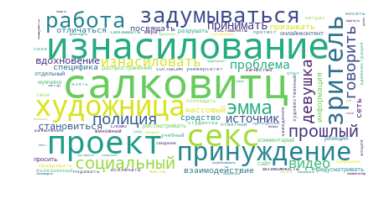

In [139]:
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").fit_words(vref_text_freq)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

POS division

In [141]:
vref_adj, vref_adv, vref_noun, vref_verb = pos_division(vref_text_lem, stopwords)

Wordcloud vic ref noun

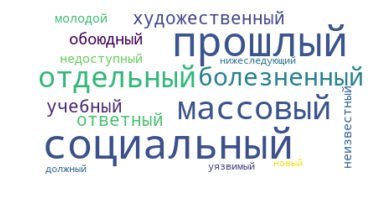

In [143]:
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").fit_words(vref_adj)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

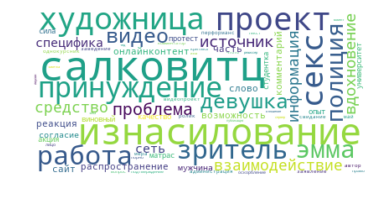

In [144]:
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").fit_words(vref_noun)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## 9. Perp Ref

In [145]:
articles_df['perp_ref'] = articles_df['article'].apply(lambda x: re.findall('<perp(.*)(</perp)', x))

In [146]:
articles_df['perp_ref'].head()

0    [(_ref><rel>однокурсник</perp_ref> во время св...
1    [(-a><perp-a_ref>Жителя Саратова</perp-a_ref> ...
2    [(_ref>продюсером,, </perp), (_ref>продюсера D...
3                                                   []
4    [(><perp-[abc]_ref>трех полицейских,</perp-[ab...
Name: perp_ref, dtype: object

In [147]:
articles_df['perp_ref'] = articles_df['perp_ref'].apply(lambda x: ref_extractor(x))

In [148]:
tmp_pref_texts = articles_df['perp_ref'].tolist()
pref_texts = tmp_pref_texts[0]

pref_texts = text_extractor(pref_texts)

pref_text_lem = ''.join(m.lemmatize(pref_texts))

pref_text_lem = ''.join(re.findall('[А-Яа-я ]',pref_text_lem))

In [215]:
type(pref_text_lem)

str

Save as txt

In [223]:
clean_pref_lem = []

for i in pref_text_lem.split():
    
    if i not in stopwords:
        
        clean_pref_lem.append(i)

clean_pref_lem = " ".join(clean_pref_lem)

with open("perp_ref.txt", "w") as text_file:
    text_file.write(clean_pref_lem)

In [149]:
pref_text_freq = word_count(pref_text_lem, stopwords)

In [150]:
pref_adj, pref_adv, pref_noun, pref_verb = pos_division(pref_text_lem, stopwords)

Wordcloud perpetrator perp reference general

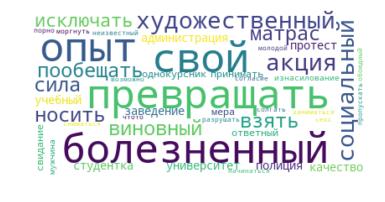

In [151]:
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").fit_words(pref_text_freq)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

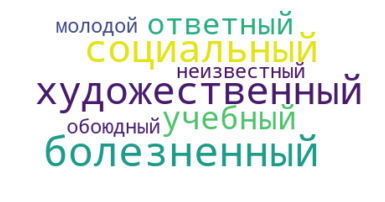

In [152]:
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").fit_words(pref_adj)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

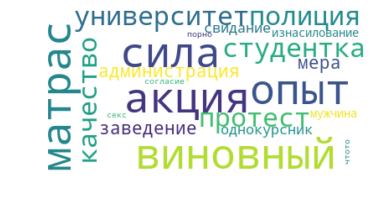

In [153]:
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").fit_words(pref_noun)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## 10. <header\>

find all the headers and clean the text. also count frequencies

In [268]:
def header_finder(x):

    header = re.findall('<header>(.*)</header>', x)
    
    if len(header) > 0:
        header = header[0]
        
    
    
    return header

In [269]:
articles_df['header'] = articles_df['article'].apply(lambda x: header_finder(x))

In [307]:
def header_cleaner(x, stoplist):
    
    headers_clean = []
    headers_freq = {}
    
    for item in x:
        if len(item) > 0:
            header_lem = ''.join(m.lemmatize(item[0]))
            header_lem = ''.join(re.findall('[А-Яа-я ]', header_lem))

    
            for word in header_lem.split():
        
                if word not in stoplist:
                    headers_clean.append(word)
            
                    if word in headers_freq:
                        headers_freq[word] += 1
                
                    else:
                        headers_freq[word] = 1
                        
    

    
    return ' '.join(headers_clean), headers_freq

In [273]:
#headers_clean, headers_freq = header_cleaner(articles_df['header'], stopwords)

In [262]:
headers_freq.pop(' ')
headers_freq.pop('\n')

75

headers wordcloud

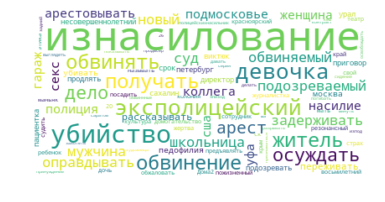

In [263]:
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").fit_words(headers_freq)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## <subst\>

In [282]:
articles_df['subst'] = articles_df['article'].apply(lambda x: re.findall('<subst>(.*)</subst>', x))

In [390]:
len(articles_df)

87

Will use header_cleaner to extract the text, bc the data structure is the same

In [308]:
subst_lem, subst_freq = header_cleaner(articles_df['subst'], stopwords)

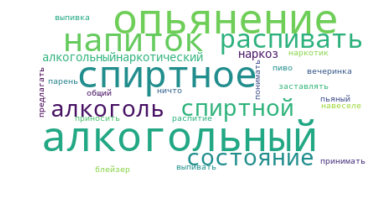

In [310]:
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").fit_words(subst_freq)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## <intc\>

In [283]:
articles_df['intc'] = articles_df['article'].apply(lambda x: re.findall('<intc(.*)</intc', x))

In [311]:
intc_lem, intc_freq = header_cleaner(articles_df['intc'], stopwords)

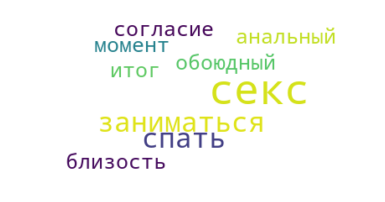

In [314]:
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").fit_words(intc_freq)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## <sexc\>

In [315]:
articles_df['sexc'] = articles_df['article'].apply(lambda x: re.findall('<sexc>(.*)</sexc>', x))

In [316]:
sexc_lem, sexc_freq = header_cleaner(articles_df['sexc'], stopwords)

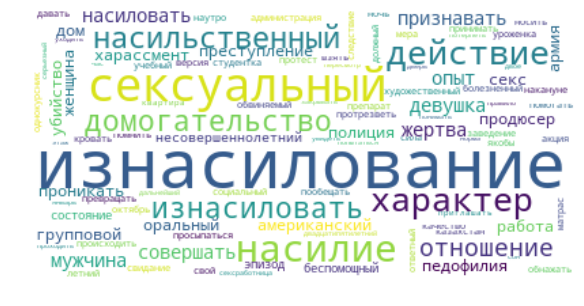

In [389]:
# Create and generate a word cloud image:
plt.figure( figsize=(10, 5) )
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", width=400, height=200).fit_words(sexc_freq)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Vbl Score

In [323]:
vbl_indic = ["потерпеть", "претерпеть", "получать", "подвергаться",
             "становиться", "происходить", "спровоцировать", "провоцировать",
             "выглядеть", "случаться", "употреблять", "переживать", "одеваться", "пострадать"]

vbl_score = vbl + intc + subst + vbl_indic + perp/vic

First we ll have to lemmatize the whole article

In [324]:
def cleaner(x):
    
    x = ''.join(re.findall('[А-Яа-я ]', x))
    x = m.lemmatize(x)
    
    return x

In [325]:
articles_df['article_lem'] = articles_df['article'].apply(lambda x: cleaner(x))

In [367]:
articles_df

,id,article,vic_text,article_length,vic_text_length,vic_text_percent,perp_text,perp_text_length,perp_text_percent,vbl_text,vbl_text_length,vbl_text_percent,vic_ref,perp_ref,header,subst,intc,sexc,article_lem,vbl_score
0,217,<header>Изнасилование или нет: <vic><vic_ref>х...,"[(<vic, ><vic_ref>художница<vic_ref> показала ...",2777,334,12.027368,"[(<perp, _ref><rel>однокурсник</perp_ref> во в...",144,5.185452,"[(blm>, «Зачем тебе нужно было разрушать жизнь...",250,9.002521,"[[><, _ref>художница<, _ref> показала секс по ...",[[_ref><rel>однокурсник</perp_ref> во время св...,Изнасилование или нет: <vic><vic_ref>художница...,[],[>занимаются сексом — сначала по обоюдному сог...,[изнасиловал</sexc> <perp_ref><rel>однокурсник...,"[изнасилование, , или, , нет, , художница, ...",2.5
1,614,<header><impers><perp-a><perp-a_ref>Жителя Сар...,"[(<vic, -a_ref>девочки, </vic), (<vic, -a_ref>...",2447,200,8.173273,"[(<perp, -a><perp-a_ref>Жителя Саратова</perp-...",8,0.326931,[],0,0.000000,"[[-a_ref>девочки], [-a_ref>девятилетней девочк...",[[-a><perp-a_ref>Жителя Саратова</perp-a_ref> ...,<impers><perp-a><perp-a_ref>Жителя Саратова</p...,[],[],"[сексуальном насилии, насильственными действия...","[житель, , саратов, , быть, , судить, , за...",1.0
2,314,<header><case><vic_ref>Кеше</vic_ref> не дали ...,"[(<vic, _ref>Кеше, </vic), (<vic, _blm><vic_re...",1848,122,6.601732,"[(<perp, _ref>продюсером,, </perp), (<perp, _r...",427,23.106061,"[(blm>, <vic_ref>Певица</vic_ref> <vic_report>...",16,0.865801,"[[_ref>Кеше], [_blm><, _ref>Певица</, _ref> <,...","[[_ref>продюсером,], [_ref>продюсера Dr. Luke]...",<case><vic_ref>Кеше</vic_ref> не дали разорват...,"[заставлял её принимать наркотики и алкоголь,]",[],"[однажды дал ей препараты, которые якобы должн...","[кеш, , не, , давать, , разрывать, , контр...",2.5
4,307,"13:19, 9 июля 2020\n<header><case><impers>Осво...","[(<vic, -a><vic-a_ref>22-летней уроженки Казах...",1021,7,0.685602,"[(<perp, ><perp-[abc]_ref>трех полицейских,</p...",15,1.469148,[],0,0.000000,"[[-a><, -a_ref>22-летней уроженки Казахстана.<...","[[><perp-[abc]_ref>трех полицейских,</perp-[ab...",<case><impers>Освобожденных из-под ареста поли...,[],[],[групповом изнасиловании <vic-a><vic-a_ref>22-...,"[ , июль, , освобождать, , изпод, , арест,...",0.0
5,223,<header>«Странные игры»: Как я справлялась с т...,"[(<vic, -a><vic-a_ref>Наша героиня Анна</vic-a...",9966,257,2.578768,"[(<perp, -a_ref>соседским мальчиком</perp-a_re...",7,0.070239,"[(blm>, Ты выглядишь как ш***а, которая делает...",49,0.491672,"[[-a><, -a_ref>Наша героиня Анна</, -a_ref> (<...","[[-a_ref>соседским мальчиком</perp-a_ref>, с к...","«<vic-a_blm>Ты выглядишь как ш***а, которая де...","[пьяный, выпивала достаточно много алкоголя]",[>моменты близости],"[орального секса, Он лежит на мне, а я не могу...","[странный, , игра, , как, , я, , справлять...",5.5
6,225,<header><perp-a_ref>Подозреваемый в серии <per...,"[(<vic, -[ab]>двух <vic-[ab]>женщин<vic-[ab]> ...",757,6,0.792602,"[(<perp, -a_ref>Подозреваемый в серии <perp-as...",122,16.116248,[],0,0.000000,"[[-[ab]>двух <, -[ab]>женщин<, -[ab]> 1940 и 1...",[[-a_ref>Подозреваемый в серии <perp-as_phviol...,<perp-a_ref>Подозреваемый в серии <perp-as_phv...,[],[],"[изнасилованиях, изнасилование</sexc> и <perp-...","[подозреваемый, , в, , серия, , убийство, ...",0.5
7,604,<header><case><enforce>СК</enforce> обвинил <p...,"[(<vic, _ref>школьницы, </vic), (<vic, >12-лет...",1114,187,16.786355,"[(<perp, _ref>жителя Красноярского края, </per...",146,13.105925,"[(blm>, Следователи считают, что сотрудники це...",302,27.109515,"[[_ref>школьницы], [_blm>Следователи считают, ...","[[_ref>жителя Красноярского края], [><perp_ref...",<case><enforce>СК</enforce> обвинил <perp_ref>...,[],[],"[изнасиловании, изнасиловании]","[ск, , обвинять, , житель, , красноярский, ...",1.5
8,219,<header><case><perp-ab>В Красноярском крае <pa...,"[(<vic, -a><vic-a_ref>Девушка</vic-a_ref> сбеж...",627,312,49.760766,"[(<perp, -ab>В Красноярском крае <passive>а

write func for vbl score

In [368]:
def vbl_scorer(x, vbl_indic):
    
    score = 0
    
    #vbl_indic
    for word in vbl_indic:
        if word in x['article_lem']:
            
            score += 1/len(vbl_indic)
    #vbl
    if x['vbl_text_length'] > 0:
        score += 1
        
    #intc
    if len(x['intc']) > 0:
        score += 0.5
    
    #subst
    if len(x['subst']) > 0:
        score += 0.5
        
    #perp/vic text proportion
    if x['vic_text_length'] > (1.5 * x['vic_text_length']):
        score += 0.5
    
    return score

In [369]:
new_scores = []

for index, row in articles_df.iterrows():
    
    score = vbl_scorer(row, vbl_indic)
    new_scores.append(score)

In [370]:
articles_df['vbl_score'] = new_scores

Text(0.5, 0, 'Article ID')

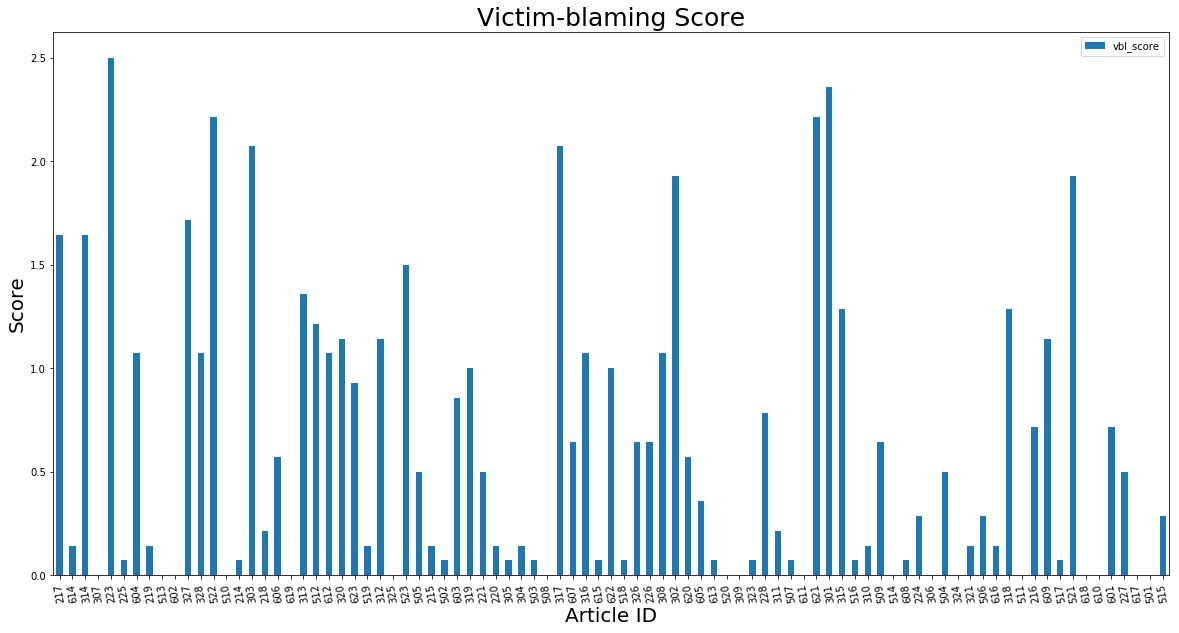

In [371]:
articles_df.plot.bar(x = 'id', y = ['vbl_score'], rot = 100, figsize=(20,10), fontsize=10)
plt.title('Victim-blaming Score', fontsize=25)
plt.ylabel('Score', fontsize=20)
plt.xlabel('Article ID', fontsize=20)


hist of vbl_score distribution

Text(0, 0.5, 'Number of Articles')

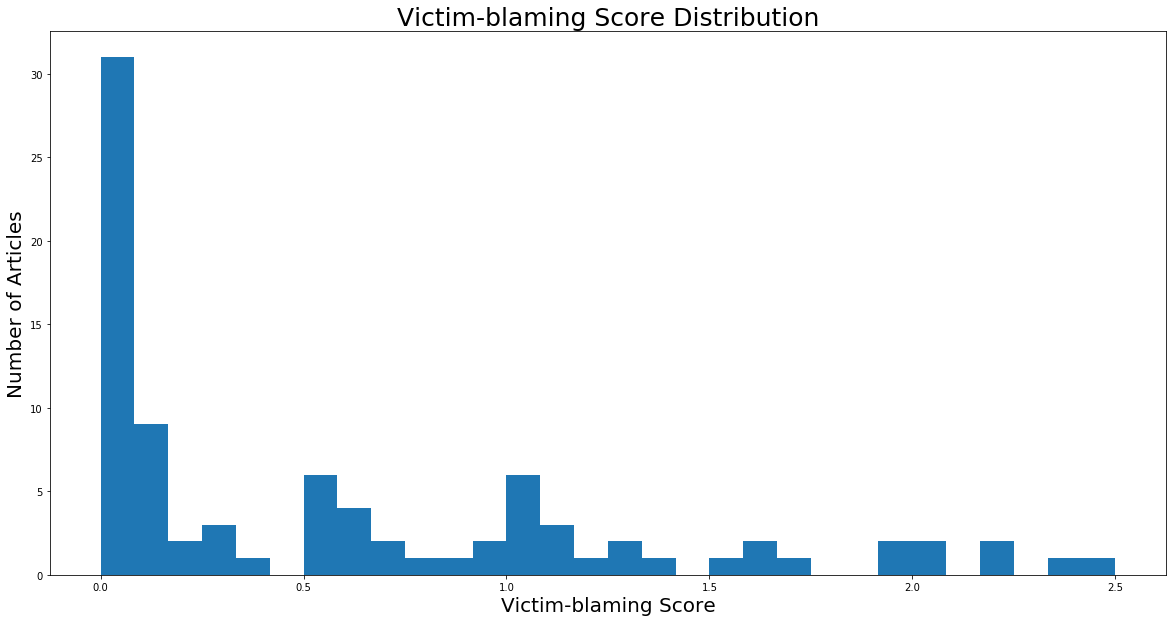

In [372]:
plt.figure(figsize=(20,10))
plt.hist(articles_df['vbl_score'], bins=30)

plt.title('Victim-blaming Score Distribution', fontsize=25)
plt.xlabel('Victim-blaming Score', fontsize=20)
plt.ylabel('Number of Articles', fontsize=20)

## 11. Word Cloud Vic

In [138]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [318]:
vic_word_freq_cut = vic_word_freq_df_cut.to_dict()['freq']

In [ ]:
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").fit_words(vic_word_freq_cut)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
wordcloud.to_file("vic_wordcloud.png")

## 9. Word Cloud Perp

In [ ]:
perp_word_freq_cut = perp_word_freq_df_cut.to_dict()['freq']

In [ ]:
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").fit_words(perp_word_freq_cut)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
wordcloud.to_file("perp_wordcloud.png")

## 10. Vic Word Cloud  Different POS

Compile a list of adjectives only.

In [319]:
def pos_division(text, stopwords):
    
    #empty dicts for the results
    
    adj = {}
    adv = {}
    noun = {}
    verb = {}
    
    #analyse
    m = Mystem()
    anal = m.analyze(text)
    
    for idx in range(len(anal)):
        
        if 'analysis' in anal[idx]:
            if len(anal[idx]['analysis']) > 0:
                if anal[idx]['text'] not in stopwords:
                
                    if 'A=' in anal[idx]['analysis'][0]['gr']:
                    
                        if anal[idx]['text'] in adj:
                            adj[anal[idx]['text']] += 1
                        else:
                            adj[anal[idx]['text']] = 1
                
                    elif 'ADV' in anal[idx]['analysis'][0]['gr']:
                    
                        if anal[idx]['text'] in adv:
                            adv[anal[idx]['text']] += 1
                        else:
                            adv[anal[idx]['text']] = 1
                            
                    elif 'S' in anal[idx]['analysis'][0]['gr']:
                    
                        if anal[idx]['text'] in noun:
                            noun[anal[idx]['text']] += 1
                        else:
                            noun[anal[idx]['text']] = 1
                        
                    elif 'V' in anal[idx]['analysis'][0]['gr']:
                                       
                        if anal[idx]['text'] in verb:
                            verb[anal[idx]['text']] += 1
                        else:
                            verb[anal[idx]['text']] = 1    
    
    return adj, adv, noun, verb

In [320]:
v_adj, v_adv, v_noun, v_verb = pos_division(vic_text_lem, stopwords)

Clean the dict with nouns (there is some junk)

In [ ]:
v_noun_clean = {}
    
for key in v_noun:
    if len(key) > 1:
        v_noun_clean[key] = v_noun[key]

### Vic Adj Wordcloud

In [ ]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").fit_words(v_adj)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
wordcloud.to_file("vic_adj_wordcloud.png")

Note: all words are lemmatized, therefore nouns are in male form

## Vic Adv Wordcloud

In [ ]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").fit_words(v_adv)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
wordcloud.to_file("vic_adv_wordcloud.png")

## Vic Verb Wordcloud

In [ ]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").fit_words(v_verb)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
wordcloud.to_file("vic_verb_wordcloud.png")

## Vic Noun Wordcloud

In [ ]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").fit_words(v_noun_clean)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
wordcloud.to_file("vic_noun_wordcloud.png")

## 11. Perp Word Cloud Different POS

In [ ]:
p_adj, p_adv, p_noun, p_verb = pos_division(perp_text_lem, stopwords)

In [ ]:
p_noun_clean = {}
    
for key in p_noun:
    if len(key) > 1:
        p_noun_clean[key] = p_noun[key]

## Perp Adj Wordcount

In [ ]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").fit_words(p_adj)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
wordcloud.to_file("perp_adj_wordcloud.png")

## Perp Adv Wordcount

In [ ]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").fit_words(p_adv)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
wordcloud.to_file("perp_adv_wordcloud.png")

## Perp Noun Wordcount

In [ ]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").fit_words(p_noun)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
wordcloud.to_file("perp_noun_wordcloud.png")

## Perp Verb Wordcount

In [ ]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").fit_words(p_verb)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
wordcloud.to_file("perp_verb_wordcloud.png")

## 12. Vbl Tag Analysis

In [ ]:
#articles_df

Put everything into one string

In [ ]:
tmp_vbl_texts = articles_df['vbl_text'].tolist()

In [ ]:
vbl_texts = tmp_vbl_texts[0]
tmp_new_vbl_texts = tmp_vbl_texts[1:]

for i in range(len(tmp_new_vbl_texts)):
    
    vbl_texts.extend(tmp_new_vbl_texts[i])

In [ ]:
vbl_text = text_extractor(vbl_texts) #all fragments of articles concearning victims concat into one str

Lemmatization, cleaning

In [ ]:
vbl_text_lem = ''.join(m.lemmatize(vbl_text))
vbl_text_lem = ''.join(re.findall('[А-Яа-я ]',vbl_text_lem))

Make list of frequencies

In [ ]:
vbl_word_freq = word_count(vbl_text_lem, stopwords)

Draw the wordcloud

## Vbl Wordcloud

In [ ]:
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").fit_words(vbl_word_freq)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
wordcloud.to_file("vbl_wordcloud.png")

Frequency dictionaries with different parts of speech

In [ ]:
vbl_adj, vbl_adv, vbl_noun, vbl_verb = pos_division(vbl_text_lem, stopwords)

## VBL Adj Wordcloud

In [ ]:
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").fit_words(vbl_adj)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
wordcloud.to_file("vbl_adj_wordcloud.png")

## VBL Adv Wordcloud

In [ ]:
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").fit_words(vbl_adv)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
wordcloud.to_file("vbl_adv_wordcloud.png")

## VBL Noun Wordcloud

In [ ]:
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").fit_words(vbl_noun)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
wordcloud.to_file("vbl_noun_wordcloud.png")

## VBL Verb Wordcloud

In [ ]:
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").fit_words(vbl_verb)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

wordcloud.to_file("vbl_verb_wordcloud.png")

## Questions 27 April:

<p> re to extract without tags?</p>
<p> 